# WeatherPy

---

### *Code to Generate Random Geographic Coordinates and a List of Cities*

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 621


---

## Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the initial code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

In [4]:
# Define an empty list to fetch the weather data for each city
city_data = []

In [5]:
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Set units of measurement
units = "imperial"

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        
    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | katsuura
Processing Record 3 of Set 1 | bowen
Processing Record 4 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 5 of Set 1 | qaanaaq
Processing Record 6 of Set 1 | mgandu
Processing Record 7 of Set 1 | mocambique
City not found. Skipping...
Processing Record 8 of Set 1 | bluff
Processing Record 9 of Set 1 | nikolskoye
Processing Record 10 of Set 1 | aukra
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | tessalit
Processing Record 13 of Set 1 | champerico
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | lompoc
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | beringovskiy
Processing Record 18 of Set 1 | grand forks
Processing Record 19 of Set 1 | yar-sale
Processing Record 20 of Set 1 | itaituba
Processing Record 21 of Set 1 | thompson
Processing Record 22 of S

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6001,-73.9662,13.23,49,72,3.62,US,1675556353
1,katsuura,35.1333,140.3000,47.35,62,16,14.16,JP,1675556353
2,bowen,-20.0167,148.2333,82.31,82,92,8.10,AU,1675556354
3,qaanaaq,77.4840,-69.3632,-4.67,59,60,2.75,GL,1675556355
4,mgandu,-5.9500,34.1333,60.31,89,83,0.49,TZ,1675556356


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,13.23,49,72,3.62,US,1675556353
1,katsuura,35.1333,140.3000,47.35,62,16,14.16,JP,1675556353
2,bowen,-20.0167,148.2333,82.31,82,92,8.10,AU,1675556354
3,qaanaaq,77.4840,-69.3632,-4.67,59,60,2.75,GL,1675556355
4,mgandu,-5.9500,34.1333,60.31,89,83,0.49,TZ,1675556356


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

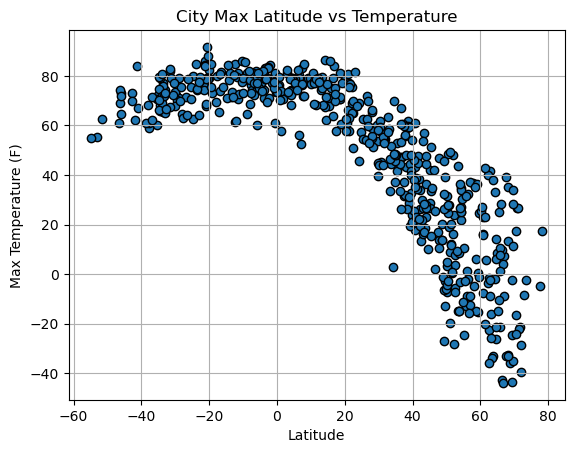

In [19]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.scatter(x_values, y_values, edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Max Latitude vs Temperature")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

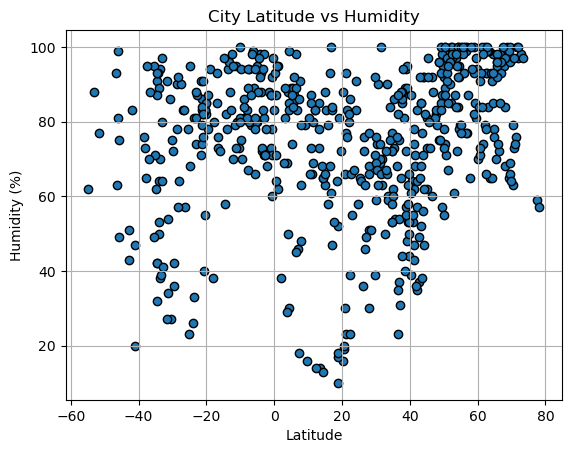

In [20]:
# Build scatter plot for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.scatter(x_values, y_values, edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

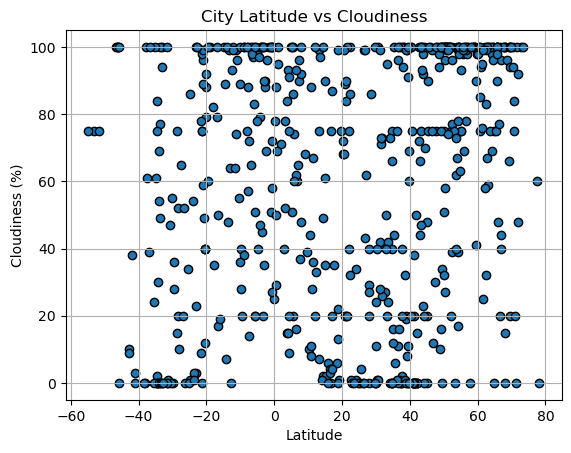

In [22]:
# Build scatter plot for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values, y_values, edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show() 

#### Latitude vs. Wind Speed Plot

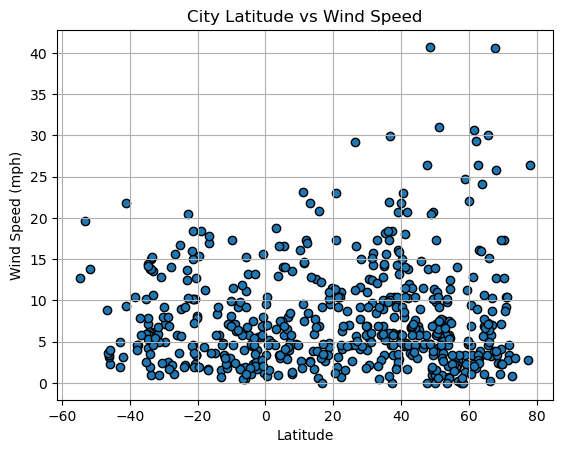

In [23]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values, y_values, edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs Wind Speed")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show() 

---

## Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots


In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE